In [1]:
from matplotlib import animation as animation
import numpy as np
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.pyplot as plt
import time
import matplotlib
import matplotlib.patches as patches
import pickle


In [8]:
joints_order = [v-1 for v in [1,2,2,3,3,4,3,5,5,6,6,7,7,8,3,9,9,10,10,11,11,12,1,13,13,14,14,15,15,16,1,17,17,18,18,19,19,20]]
joints_order=np.array(joints_order)
print(joints_order.shape)

(38,)


In [9]:
dir="C:\\Users\\leduc\\Downloads\\KhungXuong\\KhungXuong\\fast.txt"

In [10]:
with open(dir,'rt') as f:
    seq=f.read().strip().split('\n')


In [11]:
se=[]
for i, s in enumerate(seq):
    if i%2==0:
        continue
    s=s.split(' ')
    s=s[:60]
    for i,_ in enumerate(s):
        s[i]=float(_)
    s=np.array(s)
    s=s.reshape((20,3))
    se.append(s)


In [12]:
se=np.array(se)

In [7]:
print(se.shape)

(233, 20, 3)


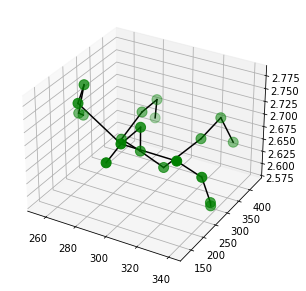

In [13]:
def plot_skel(seq,num_step=1,figsize=(5,5)):   
    
    fig = plt.figure(figsize=figsize)
    step_size = int(len(seq)/float(num_step))
    for i in range(num_step):
        ax = fig.add_subplot(1, num_step, i+1, projection='3d')
#       ax = Axes3D(plot)
        skel = seq#[step_size*i]
        for id1,id2 in zip(joints_order[::2],joints_order[1::2]):
            xs, ys, zs = [], [], []
            xs=[skel[id1,0],skel[id2,0]]
            ys=[skel[id1,1],skel[id2,1]]
            zs=[skel[id1,2],skel[id2,2]]
    #         print xs,ys,zs
    #         print zs
            ax.plot(xs,ys,zs,color=plt.cm.gray(0) )
        ax.scatter(skel[:,0],skel[:,1],skel[:,2],c='green',s=100)

#         ax.set_xlim(-0.5, 0.5)
#         ax.set_ylim(-0.5, 0.5)
#         ax.set_zlim(-0.5, 0.5)
#         ax.set_xlabel('X axis')
#         ax.set_ylabel('Y axis')
#         ax.set_zlabel('Z axis')
plot_skel(se[0])

done


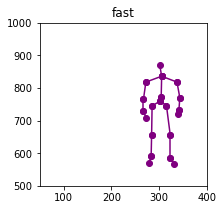

In [14]:
from matplotlib import animation as animation
import numpy as np
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.pyplot as plt
import time
import matplotlib
import matplotlib.patches as patches
import pickle
#joints order
#joints_order_org=[v for v in [4,2,2,0,0,1,1,3,0,6,0,5,5,7,7,9,6,8,8,10,6,12,12,14,14,16,12,11,5,11,11,13,13,15]]

def anim_skel():
    for s in range(1):
            fig=plt.figure(figsize=(3,3))
            plots = []
            #ax = plt.subplot2grid((3,3), (i,j))
            seq = se
            person_num = 1            
            #print(person_num)
            #joints order
            #joints order
            #joints_order=[v for v in [4,2,2,0,0,1,1,3,0,6,0,5,5,7,7,9,6,8,8,10,6,12,12,14,14,16,12,11,5,11,11,13,13,15]]             
            plt.xlim(50,400)
            plt.ylim(500,1000)
            t=dir.split('\\')[-1]
            t=t.split('.')[0]
            plt.title(t)
            #if person_num==2:   
            #    plt.xlim(900,1100)
            #   plt.ylim(100,500)
            #joints_order_org=[v for v in [4,2,2,0,0,1,1,3,0,6,0,5,5,7,7,9,6,8,8,10,6,12,12,14,14,16,12,11,5,11,11,13,13,15]]
            all_line=[]
            all_sct=[]
            for p in range(person_num):
                lines = []
                sct=[]
                N = seq.shape[0]
                data = np.array(list(range(0,N))).transpose()               
                #print(len(joints_order))
                skel = seq [0,:,:] 
                #color list
                for id1,id2 in zip(joints_order[::2],joints_order[1::2]):    
                    xs, ys = [],[]
                    xs=[skel[id1,0],skel[id2,0]]
                    ys=[1000-skel[id1,1],1000-skel[id2,1]]
                    line,= plt.plot(xs,ys,color='purple')
                    scatter=plt.scatter(xs,ys,color='purple')     
                    lines.append(line)
                    sct.append(scatter)    
                all_line.append(lines)
                all_sct.append(sct)
                #print(len(all_line))
            
            def update(num,data, lines,sct):
                
                for p,lines in enumerate(all_line):
                        for i,line in enumerate(lines):
                            segment = np.zeros((2,2))
                            joint_1 = joints_order[i*2]
                            joint_2 = joints_order[i*2+1]
                            #print(joint_1,joint_2)
                            xs=[se[num,joint_1,0],se[num,joint_2,0]]              
                            ys=[1000-se[num,joint_1,1],1000-se[num,joint_2,1]]
                            #print(xs,ys)
                            data=np.hstack((xs,ys))
                            data=data.reshape(2,2).transpose()
                            #print(data)
                            line.set_xdata(xs)
                            line.set_ydata(ys)
                            all_sct[p][i].set_offsets(data)
                        #s+=1
            
                
            anim = animation.FuncAnimation(fig, update, frames=N,fargs=(data,lines,sct),interval=100,) 
            #Writer = animation.writers['ffmpeg']
            #writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
            anim.save(t+ '.gif', writer='pillow',fps=24 )
            print('done')

anim_skel()

<ipython-input-15-b49da79b04aa>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1,  projection='3d')


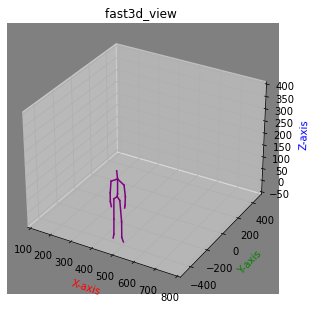

In [15]:
def anim_skel():
    from matplotlib import animation as animation
    import numpy as np
    import mpl_toolkits.mplot3d.axes3d as p3
    #if type(seqs) is not list:
    #    seqs = [seqs]
    #seqs=data3D[act*4:act*4+4]
    #n_fig = len(seqs)
    fig = plt.figure(figsize=(5,5)) 
    axs = []
    all_lines = []
    frames=[]
    frame_num=0
    t=dir.split('\\')[-1]
    t=t.split('.')[0]
    plt.title(t)
    for id_fig in range(1):
        seq = se
        ax = fig.add_subplot(1,1,1,  projection='3d')
        #joints_order_org =[v-1 for v in [1,2,2,7,7,8,8,9,1,3,3,10,10,11,11,12,1,4,4,13,13,14,14,15,1,5,5,16,16,17,17,18,1,6,6,19,19,20,20,21]]
        #joints_order = joints_order_org[::-1]
        #joints_order=np.array(joints_order)
        N = len(seq)   
        data = np.array(list(range(0,N))).transpose()
        lines = []
        sct=[]
        skel=se[0]
       # Setting the axes properties
        ax.set_xlim3d([100,800])
        ax.set_xlabel('X-axis', color='red')
        ax.set_ylim3d([-500,500])
        ax.set_ylabel('Y-axis',color='green')
        ax.set_zlim3d([-50,400])
        ax.set_zlabel('Z-axis',color='blue')
        #c=['purple','blue','green','yellow','red']
        #c.reverse()
        count_color,count= 0,1
        for id1,id2 in zip(joints_order[::2],joints_order[1::2]):    
            xs, ys, zs = [], [], []
            xs=[skel[id1,0],skel[id2,0]]
            ys=[skel[id1,1],skel[id2,1]]
            zs=[skel[id1,2],skel[id2,2]]
            #zs[0]=1000-zs[0]
            #zs[1]=1000-zs[1]
            #print( xs,ys,zs)
            #print( (zs))
            line,= ax.plot3D(xs,ys,zs,color='purple')
            #scatter=ax.scatter(xs,ys,zs,color='purple')
            #if(count%4==0):
            #    count_color+=1
            #count+=1
            lines.append(line)
            #sct.append(scatter)
        #ax
        #frame=ax.text2D(0.05, 0.95, "Frame: "+ str(frame_num), transform=ax.transAxes,color='red')
        ax.grid(True)
        ax.set_facecolor((0.5, 0.5, 0.5))
        plt.title(t+'3d_view ')
        axs.append(ax)
        all_lines.append(lines)
        
        
    def update(num, data, all_lines): 
        for id_fig,lines in enumerate(all_lines):
            seq = se#[id_fig]
            for i,line in enumerate(lines):
                segment = np.zeros((3,2),np.float32)
                joint_1 = joints_order[i*2]
                joint_2 = joints_order[i*2+1]
                segment[0,0] = seq[num,joint_1,0]
                segment[1,0] = seq[num,joint_1,2]
                segment[2,0] = seq[num,joint_1,1]
                segment[0,1] = seq[num,joint_2,0]
                segment[1,1] = seq[num,joint_2,2]
                segment[2,1] = seq[num,joint_2,1]
                #segment[2,0]=100-segment[2,0]
                #segment[2,1]=100-segment[2,1]
                #segment[1,0]=800-segment[1,0]
                #segment[1,1]=800-segment[1,1]
                segment[2,0]=200-segment[2,0]
                segment[2,1]=200-segment[2,1]
                #data=np.hstack((xs,ys))
                #data=data.reshape(2,2).transpose()
                line.set_data(segment[0:2,:]) 
                line.set_3d_properties(segment[2,:])
                #scatter.set_offset(segment[0:2,:])
            frame_num=num
        
                #print(segment[:2,:])
                #print(segment[2,:])
                #print(joint_1)
                #print(joint_2)
        return data,all_lines
    ani = animation.FuncAnimation(fig, update, frames=N,fargs=( data,all_lines), interval=100,)            
    ani.save(t+'3d'+'.gif', writer='pillow',fps=24)
    #HTML(ani.to_html5_video())
    plt.show()
    #plt.draw()
    #return ani
 
anim_skel()